In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
# Cargar dataset
Begin_Final = pd.read_csv('/content/BegInvFinal.csv')

In [9]:
Begin_Final.shape

(206529, 9)

In [10]:
Begin_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [11]:
# Formato Fecha
Begin_Final['startDate'] = pd.to_datetime(Begin_Final['startDate'])
Begin_Final.set_index('startDate', inplace=True)

In [12]:
Begin_Final.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price
startDate,,,,,,,,
2016-01-01,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99
2016-01-01,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99
2016-01-01,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99
2016-01-01,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99
2016-01-01,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99


In [13]:
#Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset.
# Calcula medidas de tendencia central, la media, mediana, desviación estándar, mínimo y máximo
#de cada columna

for i in Begin_Final.columns:
    print(i)
    print(Begin_Final[i].describe())
    print('---------------------------------')

InventoryId
count                206529
unique               206529
top       1_HARDERSFIELD_58
freq                      1
Name: InventoryId, dtype: object
---------------------------------
Store
count    206529.000000
mean         42.122457
std          23.191393
min           1.000000
25%          22.000000
50%          42.000000
75%          64.000000
max          79.000000
Name: Store, dtype: float64
---------------------------------
City
count        206529
unique           67
top       MOUNTMEND
freq          14264
Name: City, dtype: object
---------------------------------
Brand
count    206529.000000
mean      13761.482320
std       13059.429355
min          58.000000
25%        3746.000000
50%        8010.000000
75%       22143.000000
max       90090.000000
Name: Brand, dtype: float64
---------------------------------
Description
count                   206529
unique                    7291
top       Jagermeister Liqueur
freq                       459
Name: Description, dtype

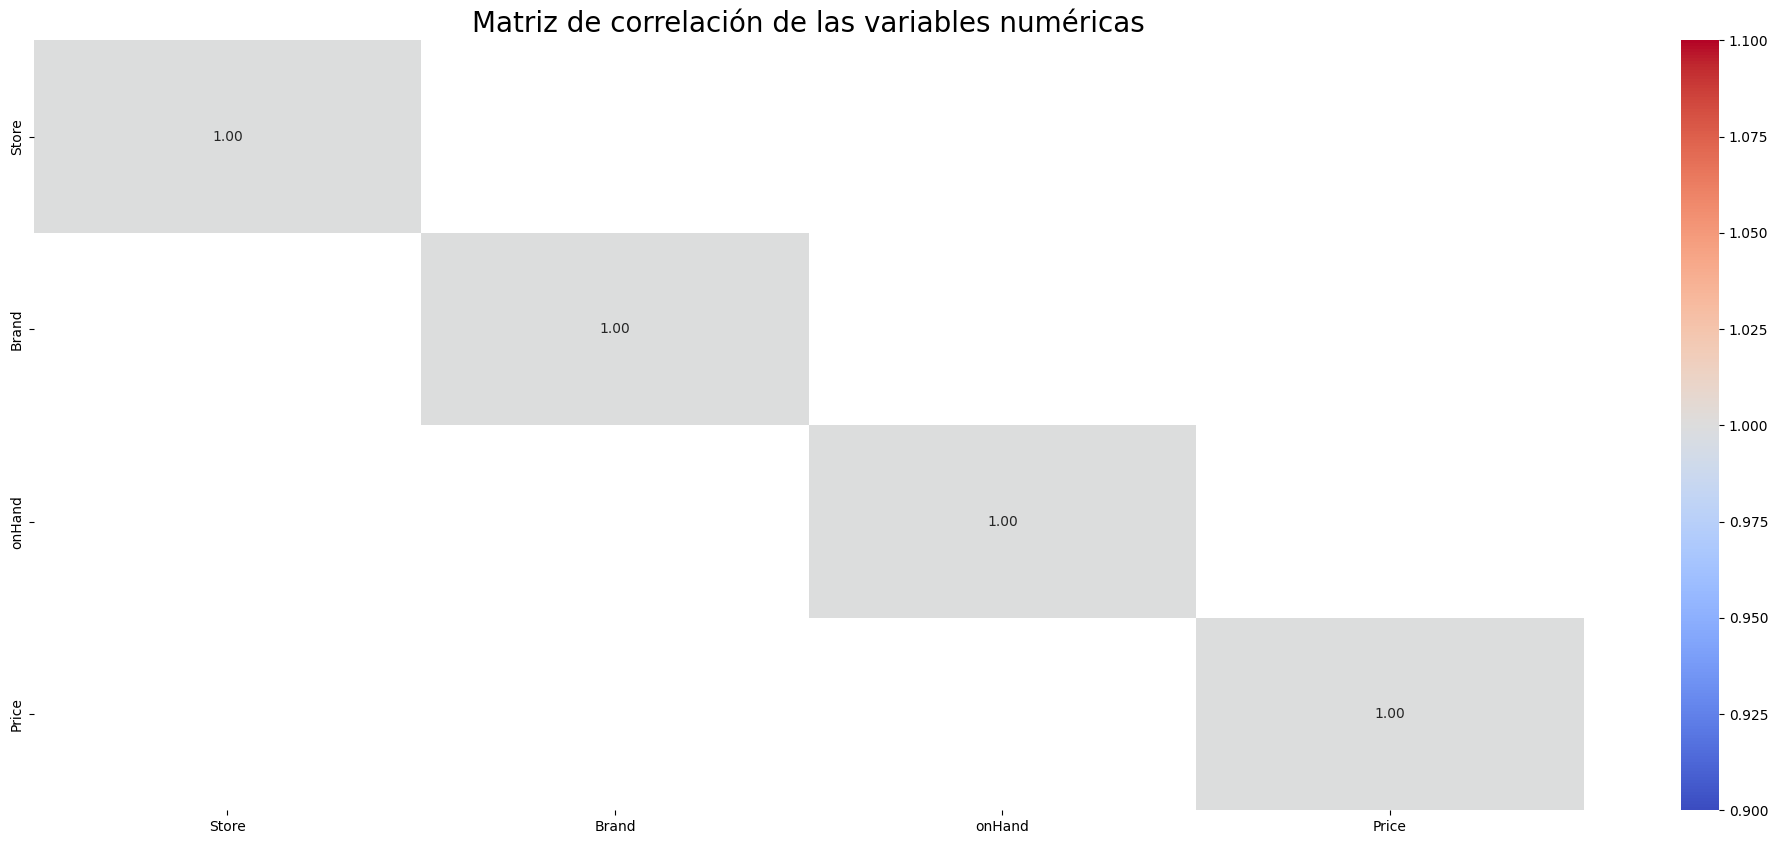

In [14]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = Begin_Final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Begin_Final[numeric_columns].corr()

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

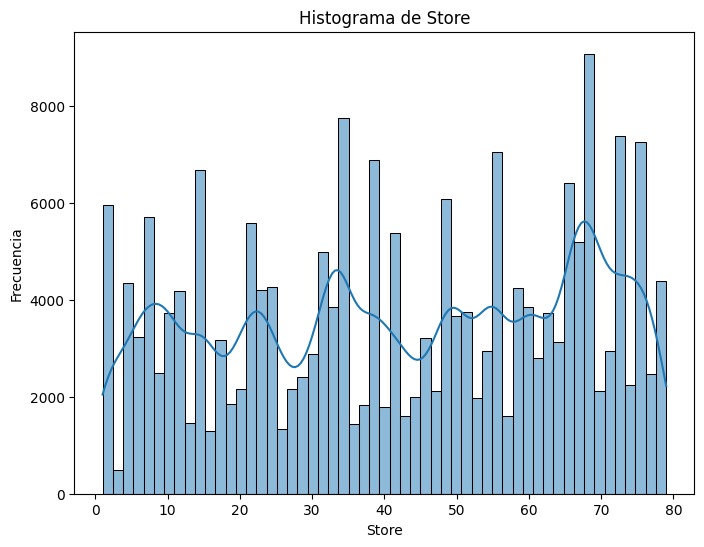

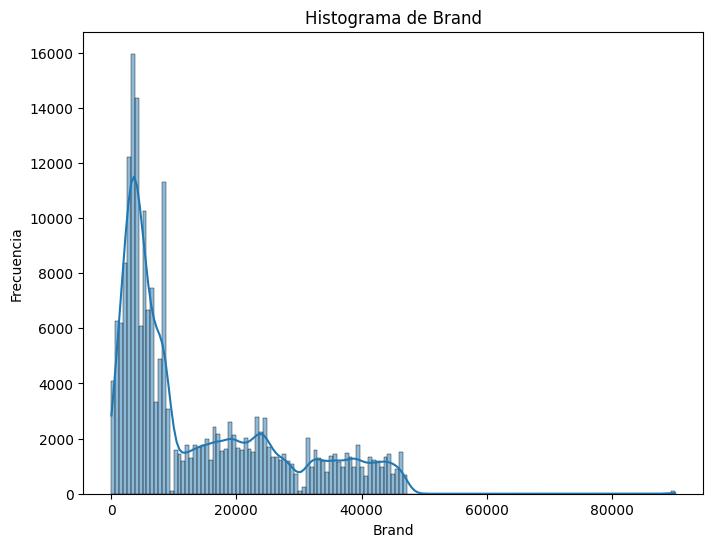

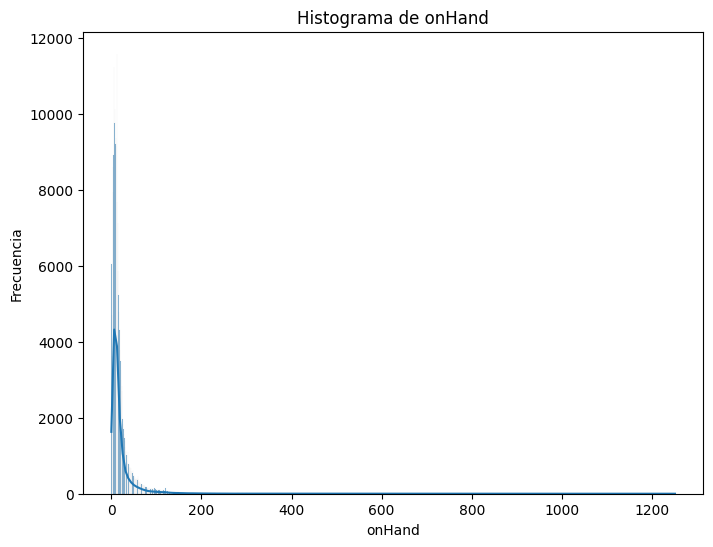

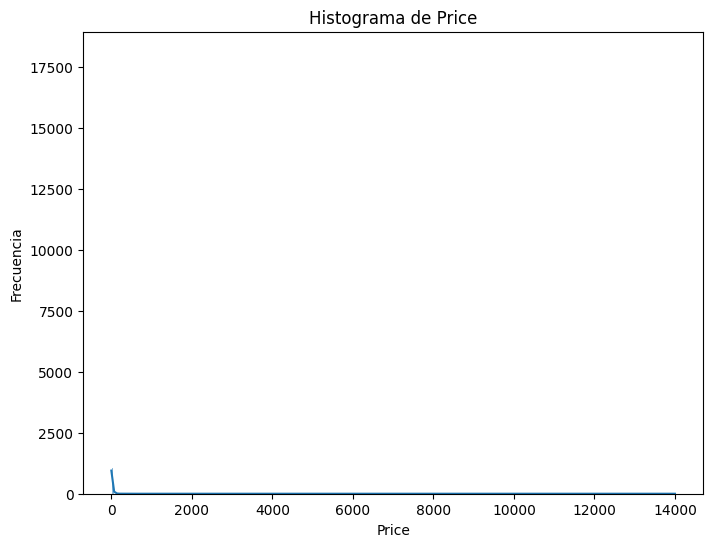

In [15]:
# prompt: histogramas

# Histogramas para cada columna numérica
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(Begin_Final[col], kde=True)  # kde=True para mostrar la curva de densidad
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


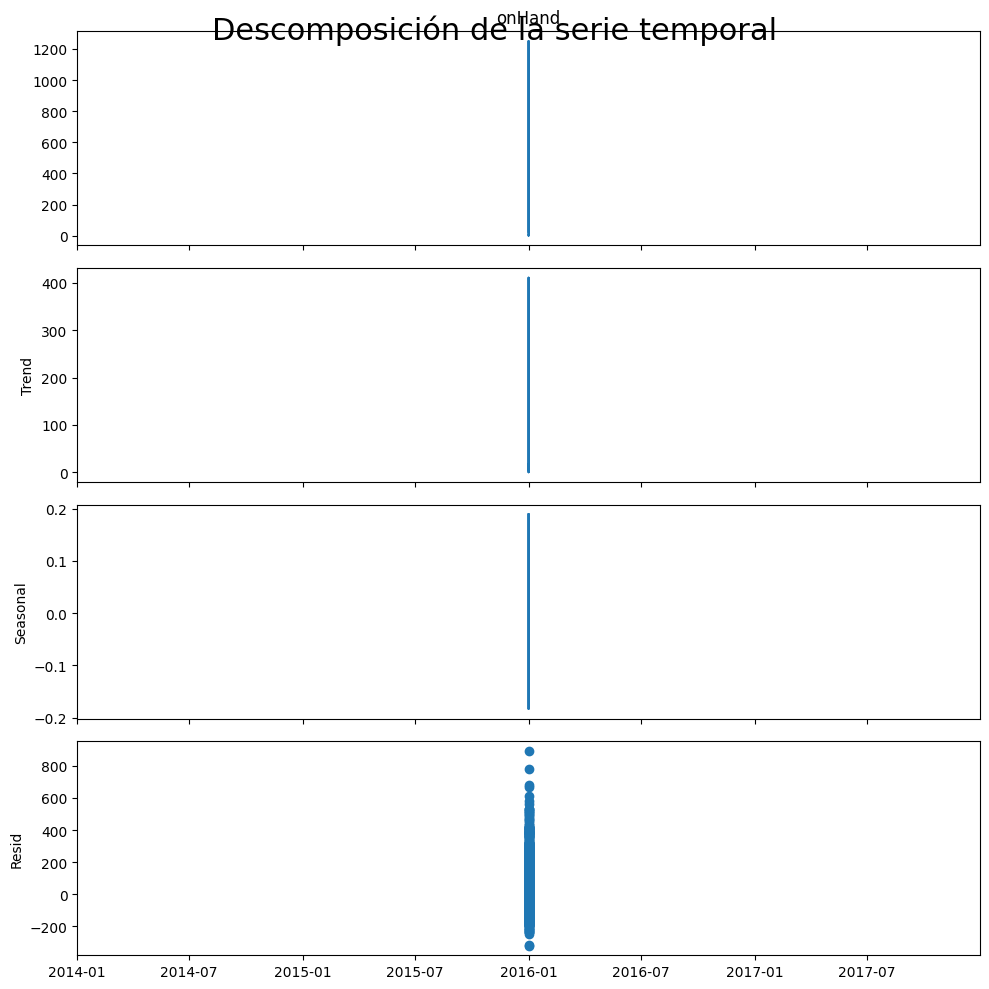

In [18]:
# prompt: series temporales

# Descomposición de la serie temporal
#Elegimos la variable 'Beginning_Inventory' para la descomposición
result = seasonal_decompose(Begin_Final['onHand'], model='additive', period=4) #period=12 para datos mensuales

# Trazar los componentes
plt.rcParams.update({'figure.figsize':(10,10)})
result.plot().suptitle('Descomposición de la serie temporal', fontsize=22)
plt.show()